# Sample Clarius Analysis

In [1]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path

print(Path().cwd())
os.chdir(Path().cwd().parent)
print(Path().cwd())

c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS\CLI-Demos
c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS


# Create raw from tar files

In [2]:
# from pyquantus.parse.clarius import ClariusTarUnpacker

# path = '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Clarius RF/PDG1738089148213.tar'
# extraction_mode = "single_tar"  # "single_sample", "multiple_samples", "single_tar"

# ClariusTarUnpacker(path, extraction_mode) 

In [3]:
# from pyquantus.parse.clarius import ClariusTarUnpacker

# path = r'D:\Omid\0_samples\6_test_with_without_gain\10.02.2025'
# extraction_mode = "single_sample"  # "single_sample", "multiple_samples", "single_tar"

# ClariusTarUnpacker(path, extraction_mode) 

2025-05-09 10:39:02,576 - INFO - Version 12.0.1-673 is valid.
2025-05-09 10:39:02,576 - INFO - Reading raw RF file: d:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28t07-20-59+0000_rf.raw
2025-05-09 10:39:02,582 - INFO - Opened file successfully.
2025-05-09 10:39:02,582 - INFO - Parsed header: {'id': 2, 'frames': 34, 'lines': 192, 'samples': 2928, 'samplesize': 2}
2025-05-09 10:39:02,787 - INFO - Successfully read 34 RF frames.
2025-05-09 10:39:02,788 - INFO - Loaded 34 raw RF frames of size 192 x 2928 (lines x samples)
2025-05-09 10:39:02,789 - INFO - Final data stored for 61804357200: [{'depth': 7.5, 'dB': 5.0}, {'depth': 22.5, 'dB': 13.04}, {'depth': 37.5, 'dB': 24.62}, {'depth': 52.5, 'dB': 27.55}, {'depth': 67.5, 'dB': 31.17}, {'depth': 82.5, 'dB': 35.23}, {'depth': 97.5, 'dB': 35.62}, {'depth': 112.5, 'dB': 35.98}, {'depth': 127.5, 'dB': 36.74}, {'depth': 142.5, 'dB': 39.07}]
2025-05-09 10:39:02,789 - INFO - Final data stored for 61895766460: [{'dept

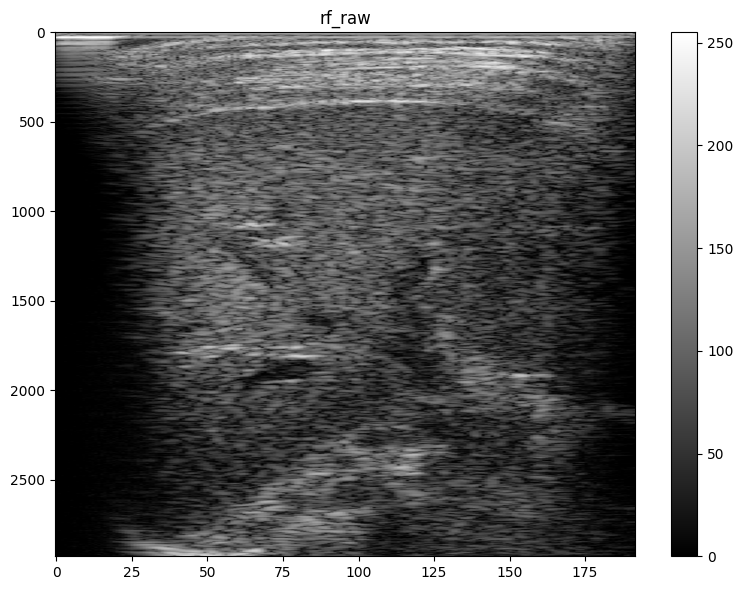

2025-05-09 10:40:08,741 - INFO - Plotting completed and displayed.
2025-05-09 10:40:08,756 - INFO - Starting the plot function.
2025-05-09 10:40:09,187 - INFO - Displayed 2D Signal Envelope.


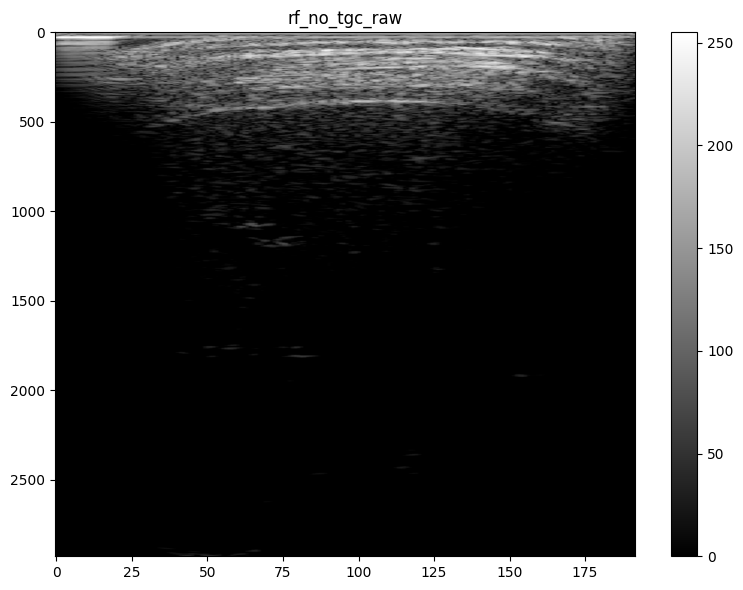

2025-05-09 10:40:09,493 - INFO - Plotting completed and displayed.


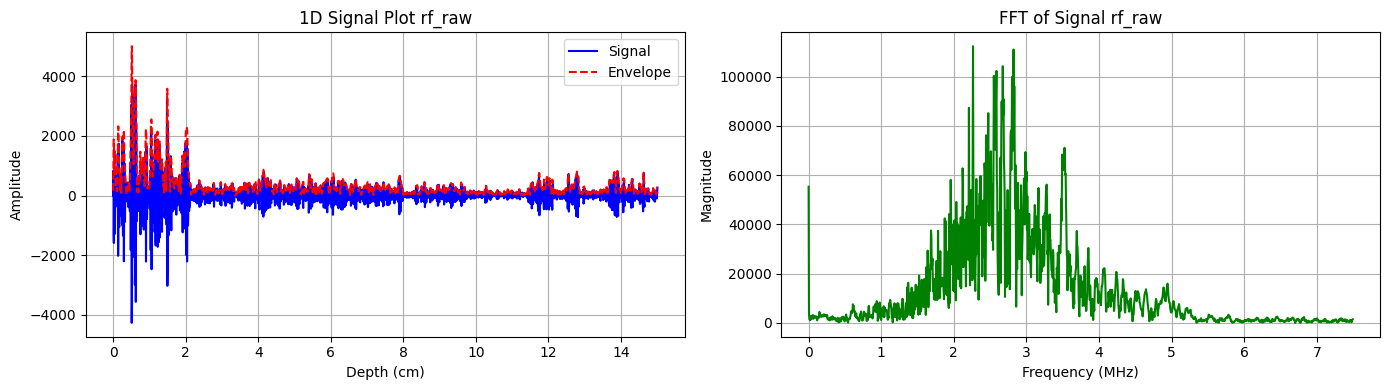

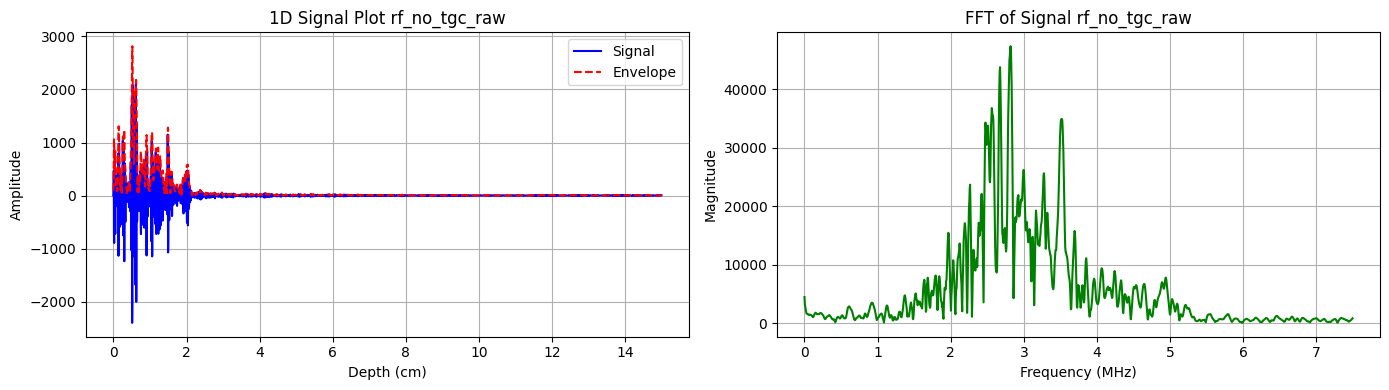

In [4]:
from pyquantus.parse.clarius import ClariusParser

rf_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28t07-20-59+0000_rf.raw'
rf_tgc_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_env.tgc.yml'
info_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_rf.yml'

ClariusParser(rf_path, rf_tgc_path, info_path, visualize=True) # image = phantom for now


In [ ]:
from pyquantus.parse.clarius import clariusRfParser

rf_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28t07-20-59+0000_rf.raw'
rf_tgc_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_env.tgc.yml'
info_path = r'd:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28T07-20-59+0000_rf.yml'

imgData, imgInfo, refData, refInfo, scanConverted = clariusRfParser(rf_path, rf_tgc_path, info_path,
                                                                    rf_path, rf_tgc_path, info_path) # image = phantom for now

2025-05-09 10:40:10,281 - INFO - Version 12.0.1-673 is valid.
2025-05-09 10:40:10,282 - INFO - Reading raw RF file: d:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0_extracted\2025-01-28t07-20-59+0000_rf.raw
2025-05-09 10:40:10,283 - INFO - Opened file successfully.
2025-05-09 10:40:10,284 - INFO - Parsed header: {'id': 2, 'frames': 34, 'lines': 192, 'samples': 2928, 'samplesize': 2}
2025-05-09 10:40:10,566 - INFO - Successfully read 34 RF frames.
2025-05-09 10:40:10,568 - INFO - Loaded 34 raw RF frames of size 192 x 2928 (lines x samples)
2025-05-09 10:40:10,569 - INFO - Final data stored for 61804357200: [{'depth': 7.5, 'dB': 5.0}, {'depth': 22.5, 'dB': 13.04}, {'depth': 37.5, 'dB': 24.62}, {'depth': 52.5, 'dB': 27.55}, {'depth': 67.5, 'dB': 31.17}, {'depth': 82.5, 'dB': 35.23}, {'depth': 97.5, 'dB': 35.62}, {'depth': 112.5, 'dB': 35.98}, {'depth': 127.5, 'dB': 36.74}, {'depth': 142.5, 'dB': 39.07}]
2025-05-09 10:40:10,569 - INFO - Final data stored for 61895766460: [{'dept

# Select Image & Phantom and Parse

In [ ]:
# from pyquantus.parse.clarius import clariusRfParser

# rf_path = '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Clarius RF/PDG1738089148213_extracted/2025-01-28T18-45-21+0000_rf.raw'
# rf_tgc_path = '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Clarius RF/PDG1738089148213_extracted/2025-01-28T18-45-21+0000_env.tgc.yml'
# info_path = '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Clarius RF/PDG1738089148213_extracted/2025-01-28T18-45-21+0000_rf.yml'

# imgData, imgInfo, refData, refInfo, scanConverted = clariusRfParser(rf_path, rf_tgc_path, info_path,
#                                                                     rf_path, rf_tgc_path, info_path) # image = phantom for now

# ROI Selection (from GUI)

In [ ]:
import pickle

pkl_name = '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Clarius RF/a896ef50-1922-4df2-8995-a57b5a46d800/roi.pkl'

with open(pkl_name, 'rb') as f:
    roi_info = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Clarius RF/a896ef50-1922-4df2-8995-a57b5a46d800/roi.pkl'

In [ ]:
assert roi_info['Image Name'] == Path(rf_path).name
assert roi_info['Phantom Name'] == Path(rf_path).name

In [ ]:
scSplineX = roi_info["Spline X"]
scSplineY = roi_info["Spline Y"]
frame = roi_info["Frame"]

# Analysis Config (from GUI)

In [ ]:
from pyquantus.utc import AnalysisConfig

config = AnalysisConfig()

config.transducerFreqBand = [0, 8000000] # [min, max] (Hz)
config.analysisFreqBand = [2000000, 6000000] # [lower, upper] (Hz)
config.samplingFrequency = 15000000 # Hz
config.axWinSize = 3.85 # axial length per window (mm)
config.latWinSize = 3.85 # lateral length per window (mm)
config.windowThresh = 0.95 # % of window area required to be considered in ROI
config.axialOverlap = 0.5 # % of window overlap in axial direction
config.lateralOverlap = 0.5 # % of window overlap in lateral direction
config.centerFrequency = 3000000 # Hz

# UTC Analysis

In [ ]:
from pyquantus.utc import UltrasoundImage

frame = 0

ultrasoundImage = UltrasoundImage()
ultrasoundImage.axialResRf = imgInfo.depth / imgData.rf[frame].shape[0]
ultrasoundImage.lateralResRf = ultrasoundImage.axialResRf * (
    imgData.rf[frame].shape[0]/imgData.rf[frame].shape[1]
) # placeholder
ultrasoundImage.bmode = imgData.bMode[frame]
ultrasoundImage.scBmode = imgData.scBmode[frame]
ultrasoundImage.phantomRf = refData.rf[0]
ultrasoundImage.rf = imgData.rf[frame]
ultrasoundImage.xmap = imgData.scBmodeStruct.xmap
ultrasoundImage.ymap = imgData.scBmodeStruct.ymap

In [ ]:
from pyquantus.utc import UtcAnalysis

utcAnalysis = UtcAnalysis()
utcAnalysis.ultrasoundImage = ultrasoundImage
utcAnalysis.config = config
utcAnalysis.initAnalysisConfig()
utcAnalysis.scSplineX = scSplineX
utcAnalysis.scSplineY = scSplineY

In [ ]:
utcAnalysis.refAttenuation = 0.5 # placeholder for attenuation coefficient at center freq (dB/cm/MHz)
utcAnalysis.refBackScatterCoef = 10e-3 # placeholder for backscatter coefficient at center freq (cm^-1 sr^-1)

In [ ]:
utcAnalysis.splineToPreSc()
utcAnalysis.generateRoiWindows()
utcAnalysis.computeUtcWindows();

In [ ]:
import numpy as np

mbfArr = [window.results.mbf for window in utcAnalysis.roiWindows]
ssArr = [window.results.ss for window in utcAnalysis.roiWindows]
siArr = [window.results.si for window in utcAnalysis.roiWindows]
attArr = [window.results.attCoef for window in utcAnalysis.roiWindows]
bscArr = [window.results.bsc for window in utcAnalysis.roiWindows]
uNakagamiArr = [window.results.uNakagami for window in utcAnalysis.roiWindows]

print("Average Midband Fit:", np.mean(mbfArr), "dB")
print("Average Spectral Slope:", np.mean(ssArr), "dB/MHz")
print("Average Spectral Intercept:", np.mean(siArr), "dB")
print("Average Attenuation Coefficient:", np.mean(attArr), "dB/cm/MHz")
print("Average Backscatter Coefficient:", np.mean(bscArr), "1/cm-sr")
print("Average Nakagami Parameter:", np.mean(uNakagamiArr))
print("w Nakagami Parameter:", utcAnalysis.nakagamiParams[0])
print("u Nakagami Parameter:", utcAnalysis.nakagamiParams[1])
# print("Effective Scatterer Diameter:", utcAnalysis.effectiveScattererDiameter, "µm") 
# print("Effective Scatterer Concentration:", utcAnalysis.effectiveScattererConcentration, "dB/mm^3")

Average Midband Fit: 0.0 dB
Average Spectral Slope: 0.0 dB/MHz
Average Spectral Intercept: 0.0 dB
Average Attenuation Coefficient: 0.5 dB/cm/MHz
Average Backscatter Coefficient: 0.01 1/cm-sr
Average Nakagami Parameter: 5.795984434312418
w Nakagami Parameter: 50196.39130843499
u Nakagami Parameter: 1.1925533517873792


# Visualizations

In [ ]:
from pyquantus.utc import UtcData
from pyquantus.parse.objects import ScConfig

scConfig = ScConfig()
scConfig.width = imgInfo.width1
scConfig.tilt = imgInfo.tilt1
scConfig.startDepth = imgInfo.startDepth1
scConfig.endDepth = imgInfo.endDepth1

utcData = UtcData()
utcData.utcAnalysis = utcAnalysis
utcData.scConfig = scConfig

In [ ]:
utcData.convertImagesToRGB()

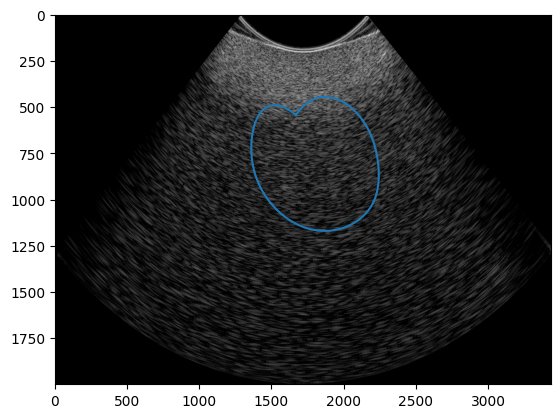

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(utcData.scBmode, aspect='auto')
plt.plot(scSplineX, scSplineY);

In [ ]:
utcData.drawCmaps()
utcData.scanConvertCmaps()

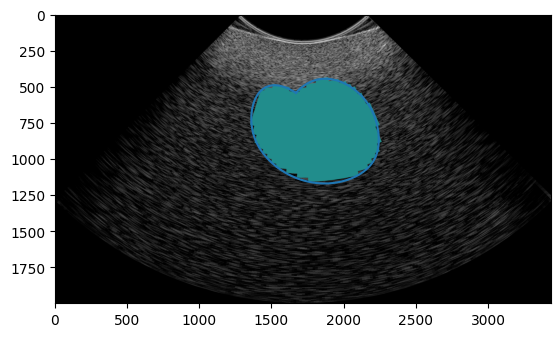

In [ ]:
# Note cmap is solid as image = phantom in this case
plt.imshow(utcData.scMbfIm)
plt.plot(scSplineX, scSplineY);